In [1]:
# Importing necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
# Load the dataset
df = pd.read_csv('/kaggle/input/bollywood-2023/bollywood2023.csv')

# Display the first few rows of the dataset
df.head()

,Released Date,Movie,Worldwide,India Hindi Net,India Gross,Overseas,Budget,Verdict
0,22 Dec 2023,Salaar: Cease Fire - Part 1,325,53.20,247.3,77.7,200,NaN
1,21 Dec 2023,Aquaman and the Lost Kingdom,-,0.40,-,-,1,NaN
2,21 Dec 2023,Dunki,157,106.43,90,67,1,NaN
3,07 Dec 2023,Hi Nanna,67.1,0.11,50.9,16.2,1,NaN
4,01 Dec 2023,Sam Bahadur,114.2,81.90,96.7,17.5,1,NaN


**What does the distribution of the movie budgets look like in Bollywood 2023?**

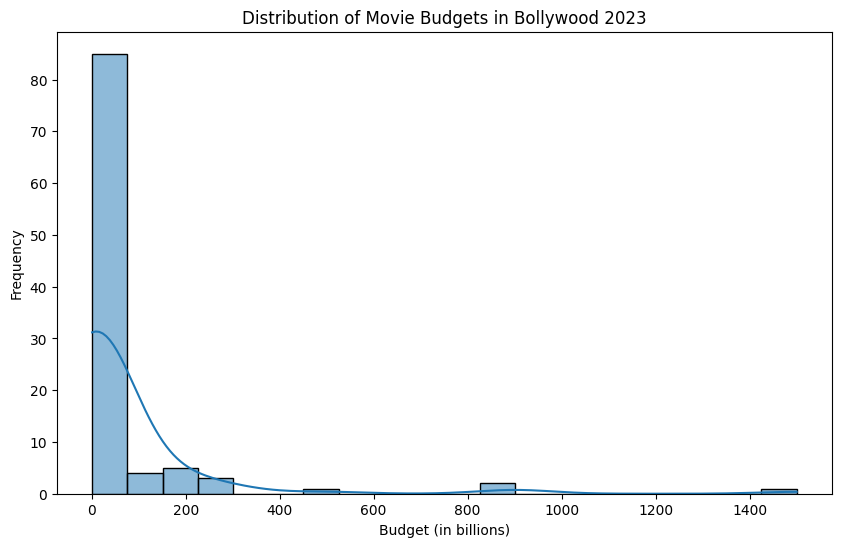

In [2]:
# Plotting the distribution of movie budgets
plt.figure(figsize=(10, 6))
sns.histplot(df['Budget'], bins=20, kde=True)
plt.title('Distribution of Movie Budgets in Bollywood 2023')
plt.xlabel('Budget (in billions)')
plt.ylabel('Frequency')
plt.show()

**How is the correlation between different financial metrics (Worldwide, India Hindi Net, India Gross, Overseas) in the Bollywood 2023 dataset?**

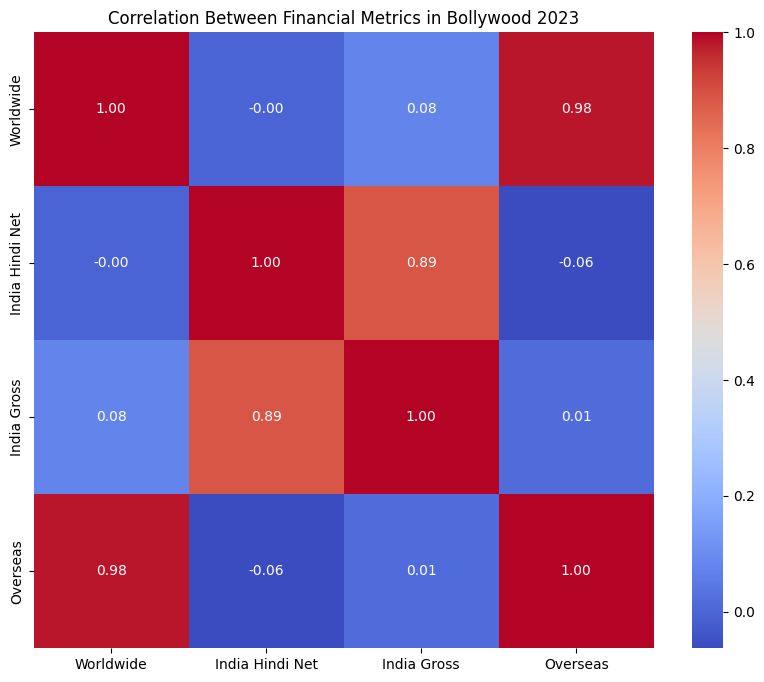

In [3]:
# Replace non-numeric values with NaN
df[['Worldwide', 'India Hindi Net', 'India Gross', 'Overseas']] = df[['Worldwide', 'India Hindi Net', 'India Gross', 'Overseas']].replace('-', np.nan)

# Convert columns to numeric
df[['Worldwide', 'India Hindi Net', 'India Gross', 'Overseas']] = df[['Worldwide', 'India Hindi Net', 'India Gross', 'Overseas']].apply(pd.to_numeric, errors='coerce')

# Calculate the correlation matrix
financial_metrics_corr = df[['Worldwide', 'India Hindi Net', 'India Gross', 'Overseas']].corr()

# Plot the correlation heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(financial_metrics_corr, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Between Financial Metrics in Bollywood 2023')
plt.show()

**What is the trend in the number of movie releases over time in Bollywood 2023?**

In [4]:
# Convert 'Released Date' to datetime
df['Released Date'] = pd.to_datetime(df['Released Date'])

# Group by release date and count the number of releases
release_count = df.groupby('Released Date').size().reset_index(name='Number of Releases')

# Plotting the trend in the number of movie releases over time
fig = px.line(release_count, x='Released Date', y='Number of Releases', title='Trend in Movie Releases Over Time (Bollywood 2023)')
fig.show()


**What is the distribution of movie verdicts in Bollywood 2023?**

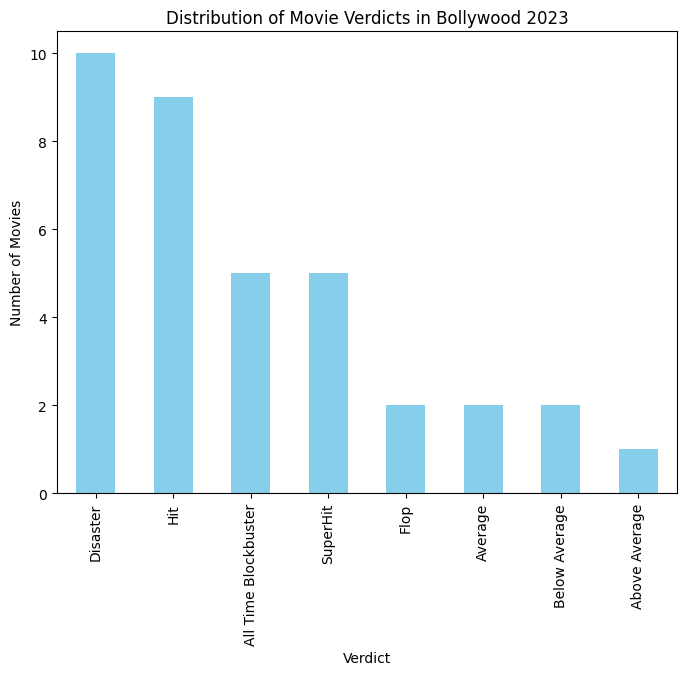

In [5]:
# Count the number of movies for each verdict
verdict_distribution = df['Verdict'].value_counts()

# Plotting the distribution of movie verdicts
plt.figure(figsize=(8, 6))
verdict_distribution.plot(kind='bar', color='skyblue')
plt.title('Distribution of Movie Verdicts in Bollywood 2023')
plt.xlabel('Verdict')
plt.ylabel('Number of Movies')
plt.show()


**What is the relationship between the movie budget and its worldwide earnings in Bollywood 2023?**

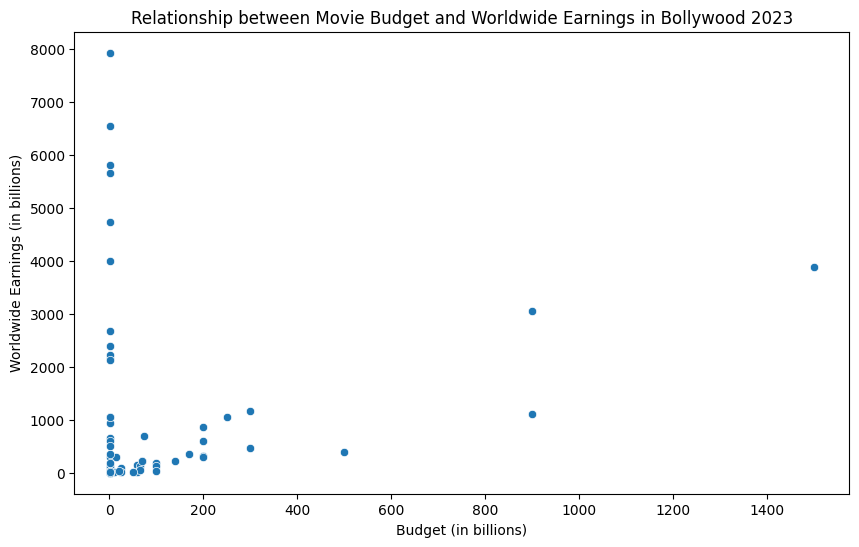

In [6]:
# Scatter plot for budget vs worldwide earnings
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Budget', y='Worldwide', data=df)
plt.title('Relationship between Movie Budget and Worldwide Earnings in Bollywood 2023')
plt.xlabel('Budget (in billions)')
plt.ylabel('Worldwide Earnings (in billions)')
plt.show()


**How does the distribution of India Gross earnings vary across different verdicts?**

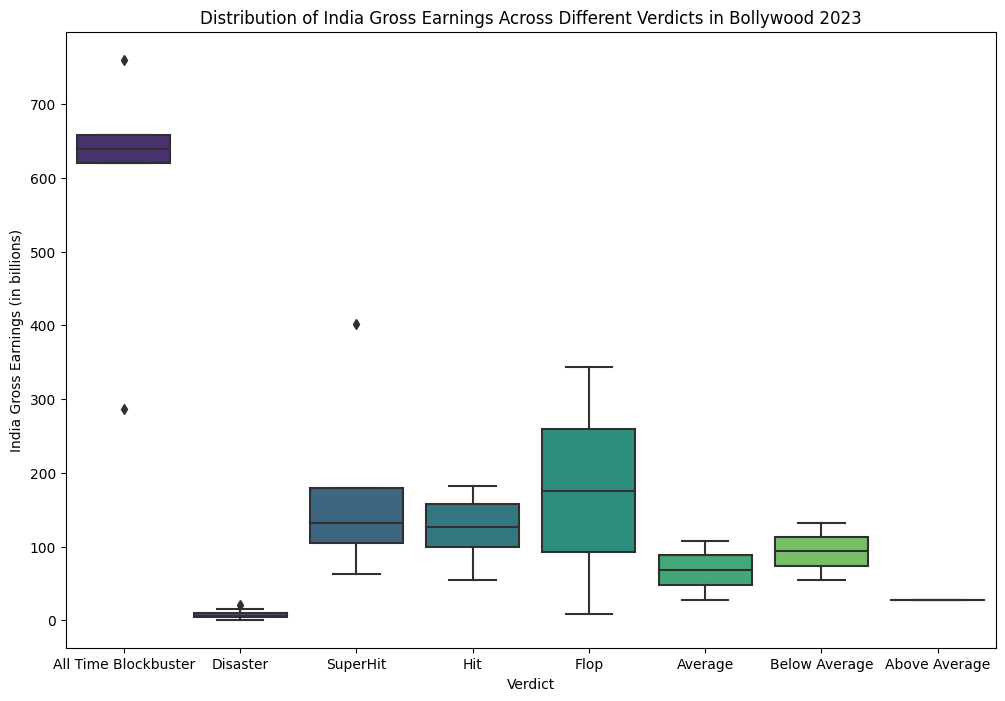

In [7]:
# Box plot for India Gross earnings by Verdict
plt.figure(figsize=(12, 8))
sns.boxplot(x='Verdict', y='India Gross', data=df, palette='viridis')
plt.title('Distribution of India Gross Earnings Across Different Verdicts in Bollywood 2023')
plt.xlabel('Verdict')
plt.ylabel('India Gross Earnings (in billions)')
plt.show()


**What is the proportion of movies in each verdict category?**

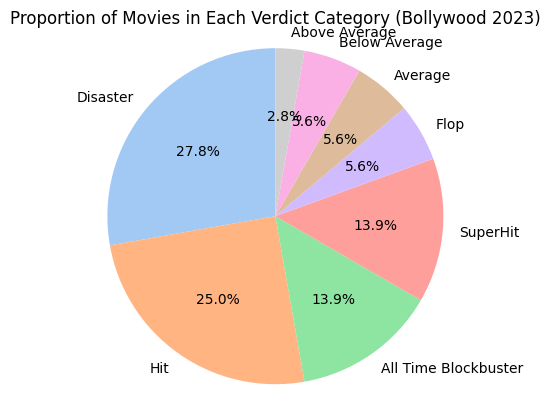

In [8]:
# Pie chart for the distribution of movie verdicts
verdict_proportion = df['Verdict'].value_counts()
labels = verdict_proportion.index
sizes = verdict_proportion.values

fig, ax = plt.subplots()
ax.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=90, colors=sns.color_palette('pastel'))
ax.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

plt.title('Proportion of Movies in Each Verdict Category (Bollywood 2023)')
plt.show()


**Can we visualize the top 10 movies based on their worldwide earnings?**

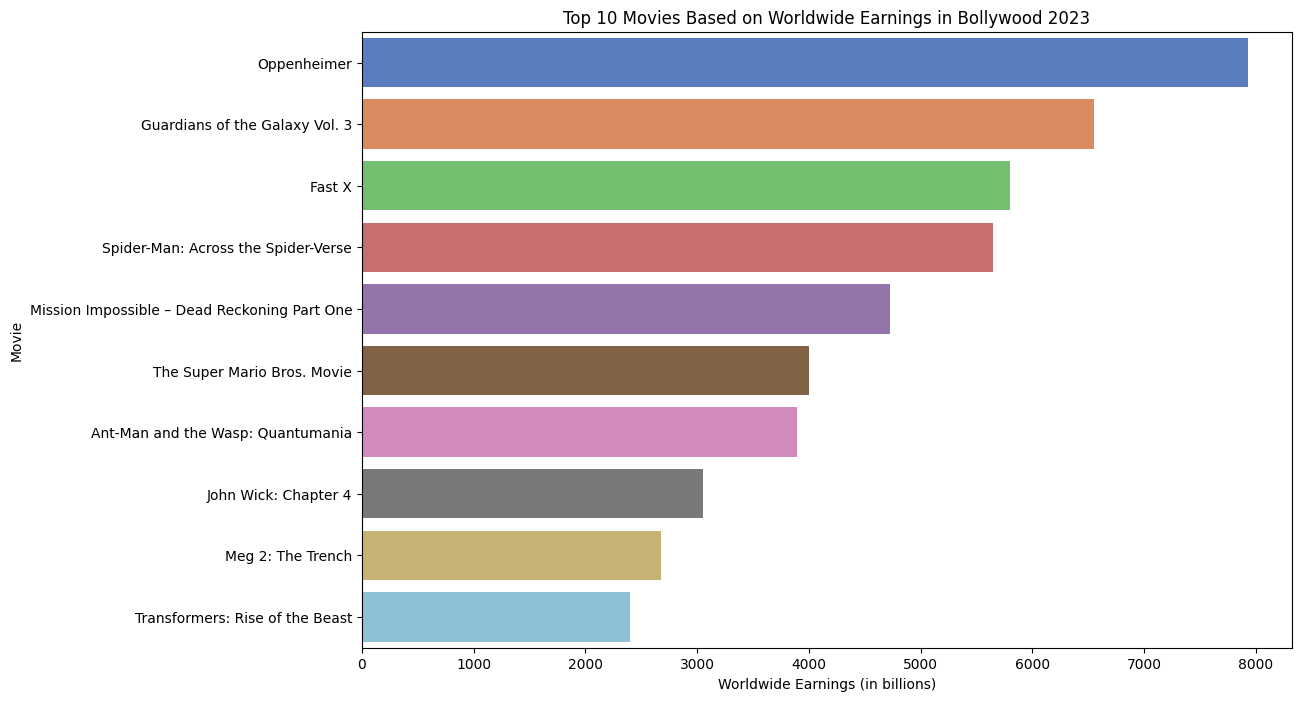

In [9]:
# Sorting dataframe by Worldwide earnings and selecting the top 10
top_10_movies = df.sort_values(by='Worldwide', ascending=False).head(10)

# Bar chart for the top 10 movies based on worldwide earnings
plt.figure(figsize=(12, 8))
sns.barplot(x='Worldwide', y='Movie', data=top_10_movies, palette='muted')
plt.title('Top 10 Movies Based on Worldwide Earnings in Bollywood 2023')
plt.xlabel('Worldwide Earnings (in billions)')
plt.ylabel('Movie')
plt.show()


**What is the distribution of movie budgets in different verdict categories?**

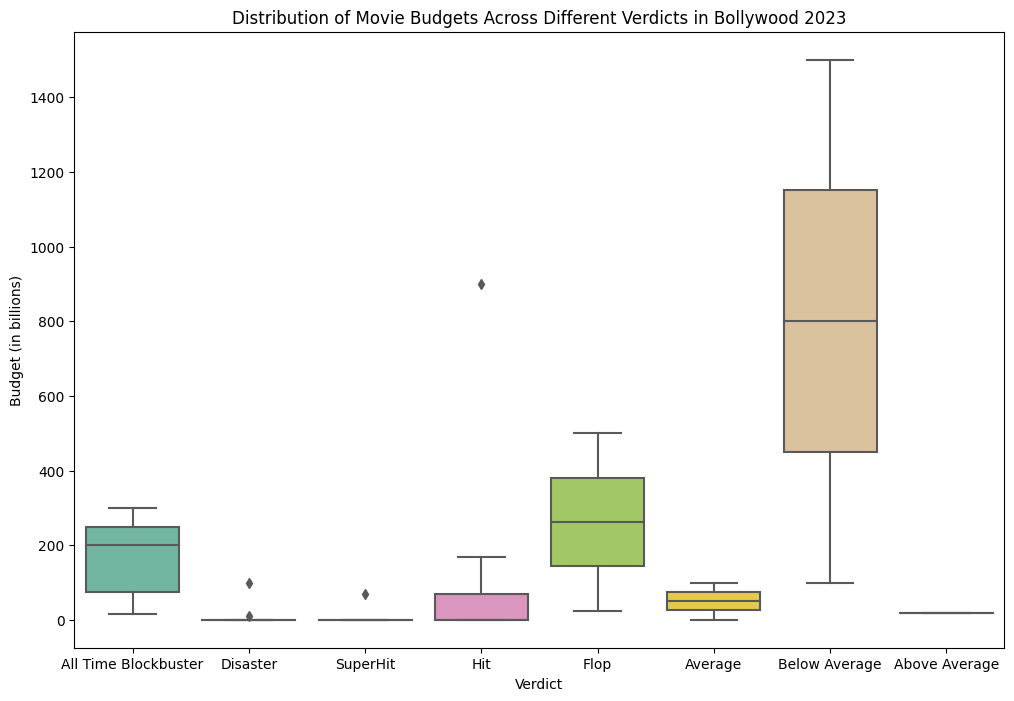

In [10]:
# Box plot for movie budgets by Verdict
plt.figure(figsize=(12, 8))
sns.boxplot(x='Verdict', y='Budget', data=df, palette='Set2')
plt.title('Distribution of Movie Budgets Across Different Verdicts in Bollywood 2023')
plt.xlabel('Verdict')
plt.ylabel('Budget (in billions)')
plt.show()


**Can we visualize the geographical distribution of movie releases in terms of verdicts?**

In [11]:
# Count of movies for each verdict in each region
verdict_region_count = df.groupby(['Verdict', 'Overseas']).size().reset_index(name='Count')

# Treemap to visualize the geographical distribution of verdicts
fig = px.treemap(verdict_region_count, 
                 path=['Overseas', 'Verdict'], 
                 values='Count', 
                 color='Count',
                 color_continuous_scale='Viridis',
                 title='Geographical Distribution of Movie Verdicts in Bollywood 2023')
fig.show()


**What is the relationship between the India Gross earnings and the budget of movies based on their verdict?**

<Figure size 1200x800 with 0 Axes>

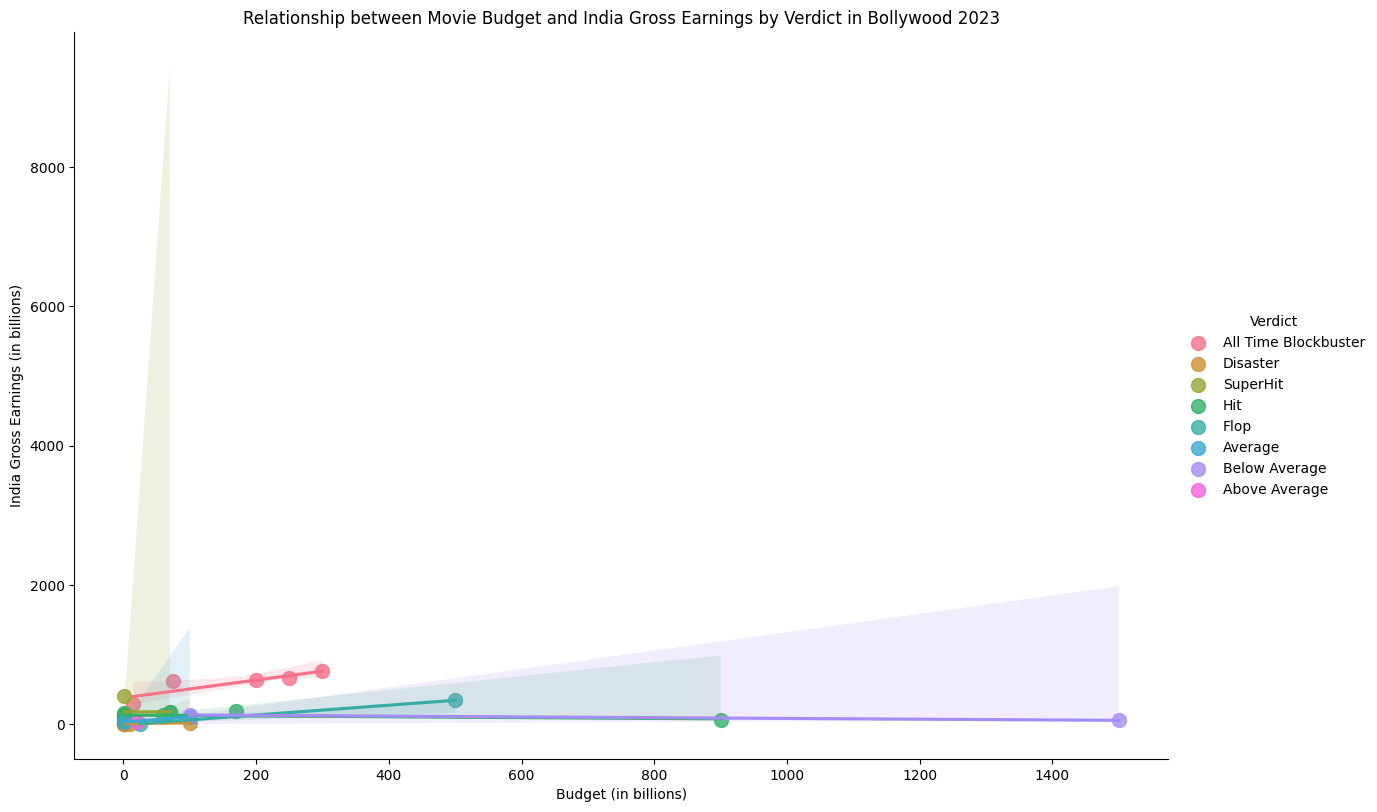

In [12]:
# Scatter plot with regression line for India Gross vs Budget, colored by Verdict
plt.figure(figsize=(12, 8))
sns.lmplot(x='Budget', y='India Gross', data=df, hue='Verdict', height=8, aspect=1.5, palette='husl', scatter_kws={'s': 100})
plt.title('Relationship between Movie Budget and India Gross Earnings by Verdict in Bollywood 2023')
plt.xlabel('Budget (in billions)')
plt.ylabel('India Gross Earnings (in billions)')
plt.show()


**Can we visualize the budget and earnings of movies through a scatter plot matrix?**

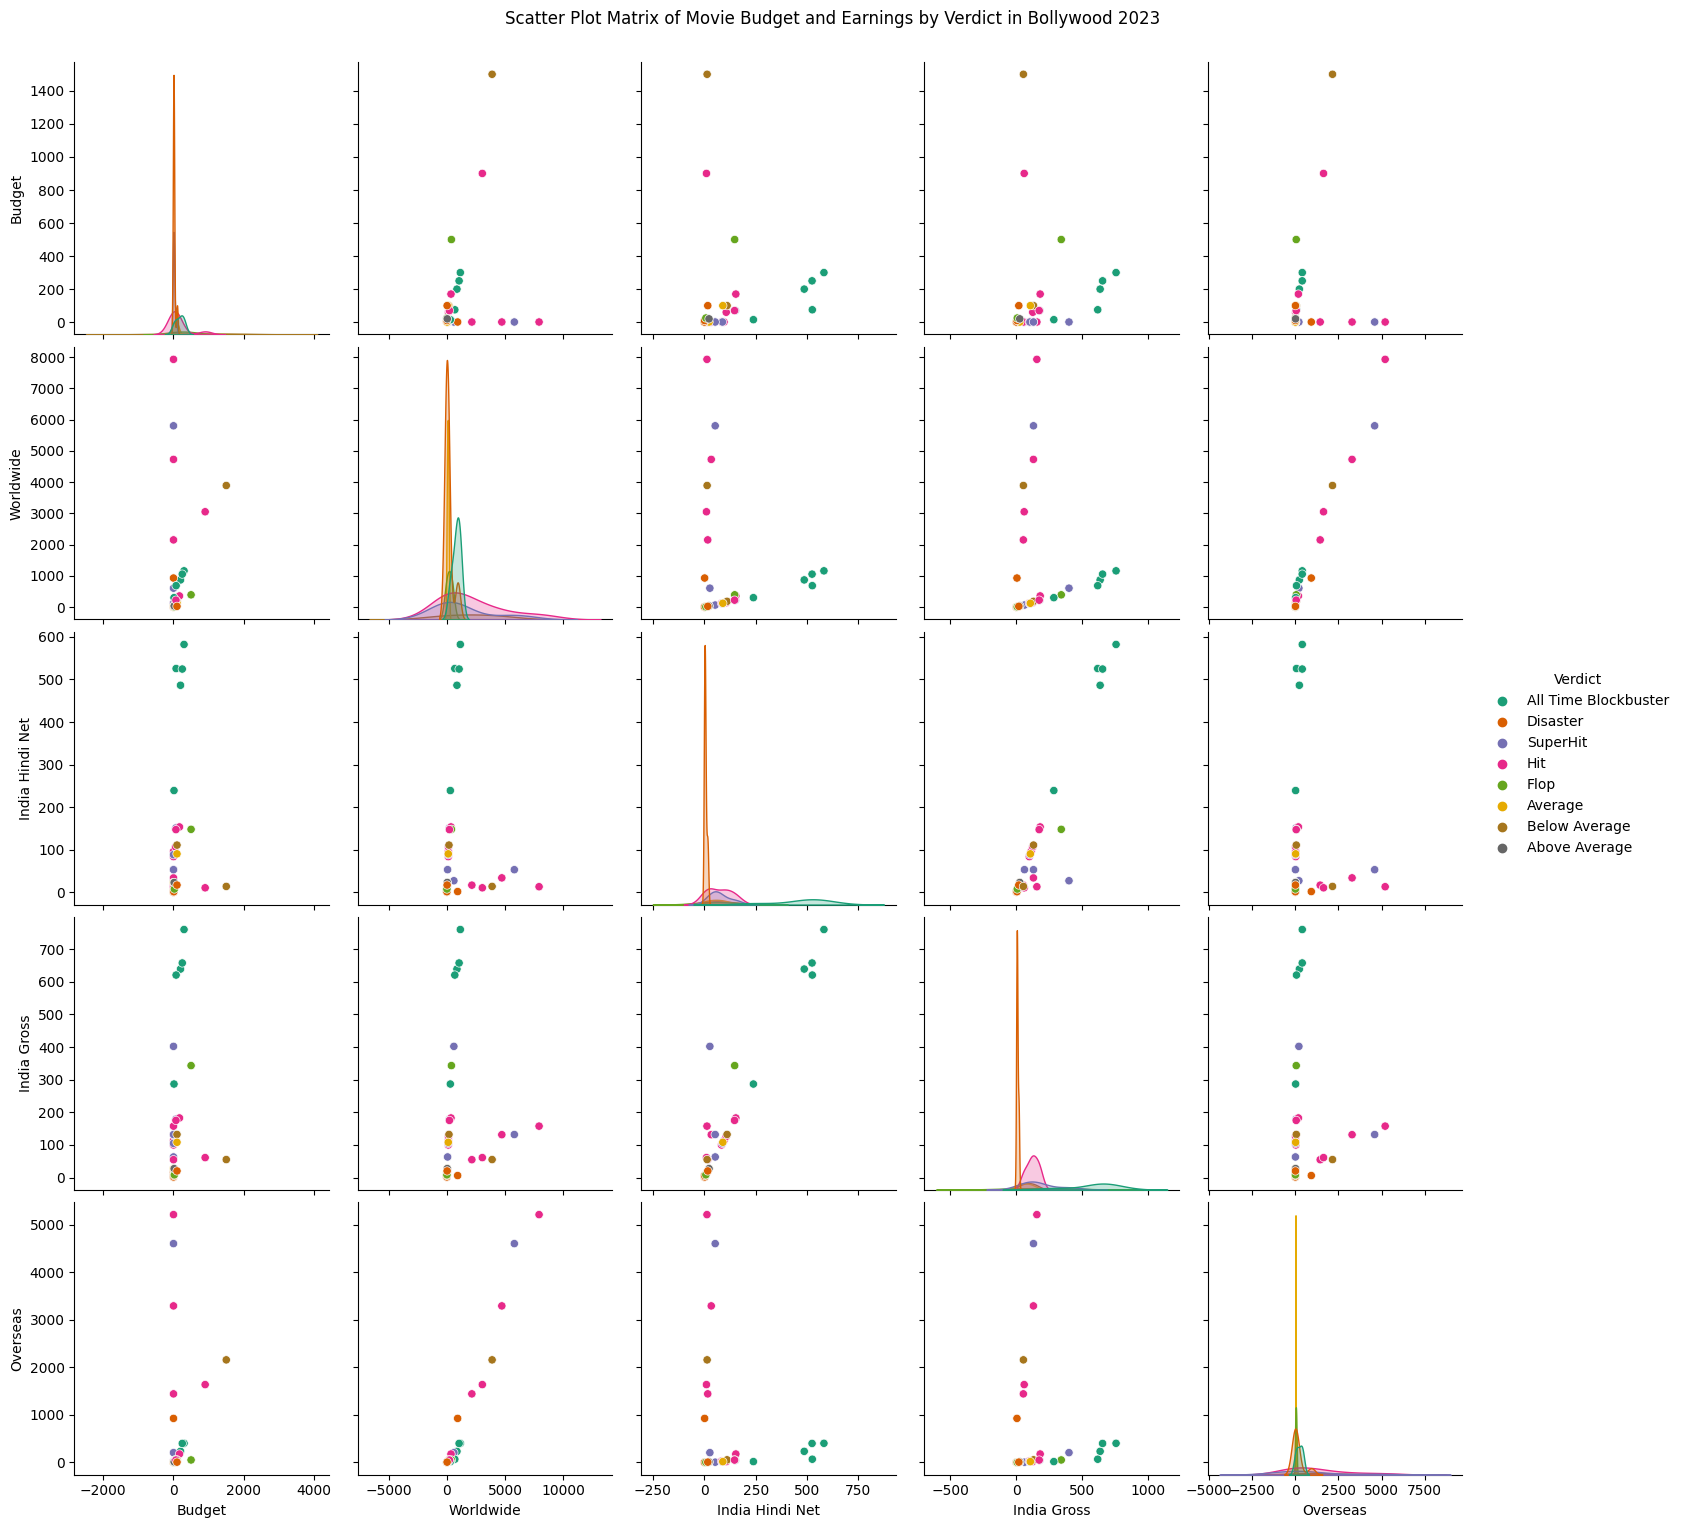

In [13]:
# Scatter plot matrix for Budget, Worldwide, India Hindi Net, India Gross, and Overseas earnings
earnings_columns = ['Budget', 'Worldwide', 'India Hindi Net', 'India Gross', 'Overseas']
sns.pairplot(df, vars=earnings_columns, hue='Verdict', palette='Dark2', height=3)
plt.suptitle('Scatter Plot Matrix of Movie Budget and Earnings by Verdict in Bollywood 2023', y=1.02)
plt.show()


**What is the distribution of movies based on their release months?**

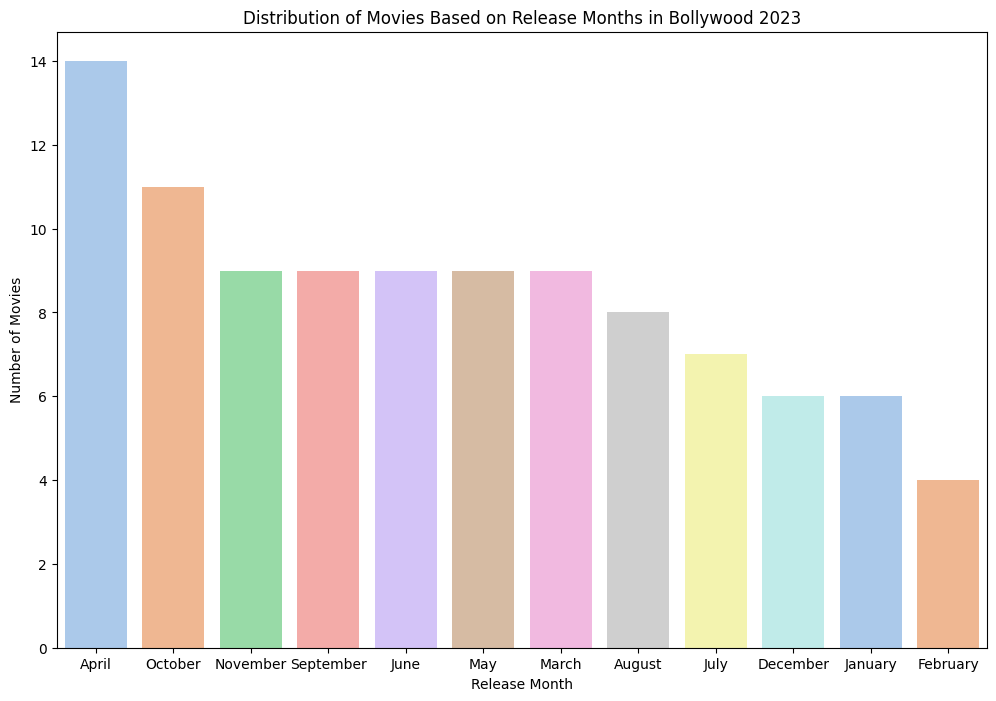

In [14]:
# Extracting the release month from 'Released Date'
df['Release Month'] = df['Released Date'].dt.month_name()

# Countplot for the distribution of movies based on release months
plt.figure(figsize=(12, 8))
sns.countplot(x='Release Month', data=df, palette='pastel', order=df['Release Month'].value_counts().index)
plt.title('Distribution of Movies Based on Release Months in Bollywood 2023')
plt.xlabel('Release Month')
plt.ylabel('Number of Movies')
plt.show()


**What is the distribution of worldwide earnings for movies with different verdicts?**

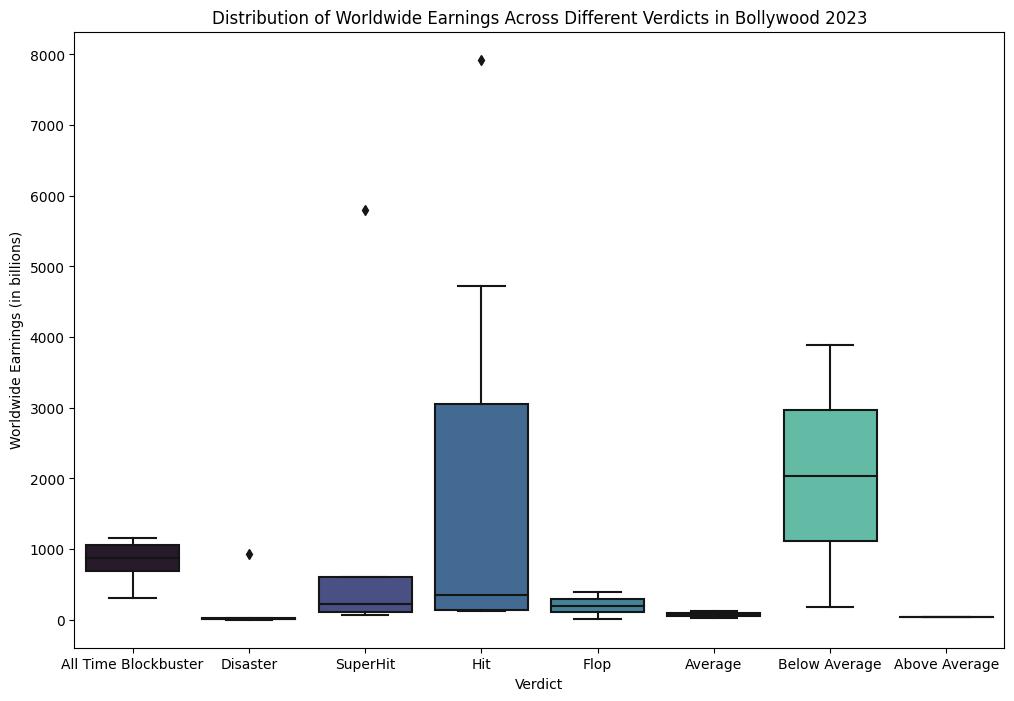

In [15]:
# Box plot for worldwide earnings by Verdict
plt.figure(figsize=(12, 8))
sns.boxplot(x='Verdict', y='Worldwide', data=df, palette='mako')
plt.title('Distribution of Worldwide Earnings Across Different Verdicts in Bollywood 2023')
plt.xlabel('Verdict')
plt.ylabel('Worldwide Earnings (in billions)')
plt.show()


**What is the relationship between India Gross earnings and Budget for movies in different release months?**

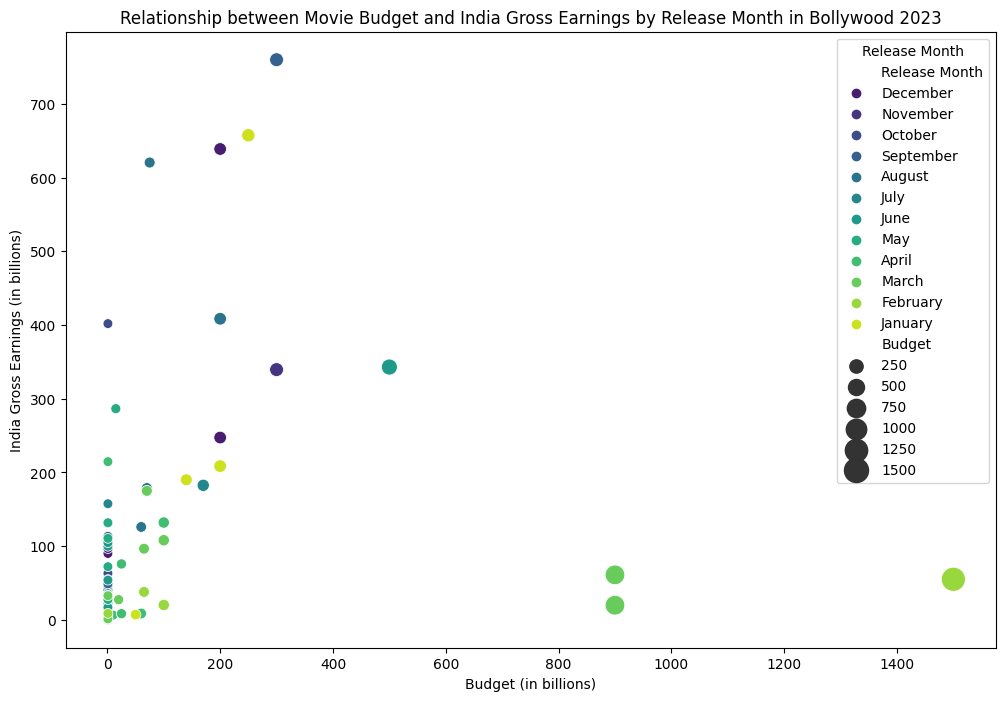

In [16]:
# Scatter plot for India Gross vs Budget, colored by Release Month
plt.figure(figsize=(12, 8))
sns.scatterplot(x='Budget', y='India Gross', hue='Release Month', data=df, palette='viridis', size='Budget', sizes=(50, 300))
plt.title('Relationship between Movie Budget and India Gross Earnings by Release Month in Bollywood 2023')
plt.xlabel('Budget (in billions)')
plt.ylabel('India Gross Earnings (in billions)')
plt.legend(title='Release Month', bbox_to_anchor=(1, 1))
plt.show()


**What is the distribution of movie budgets based on their verdict and release months?**

<Figure size 1600x800 with 0 Axes>

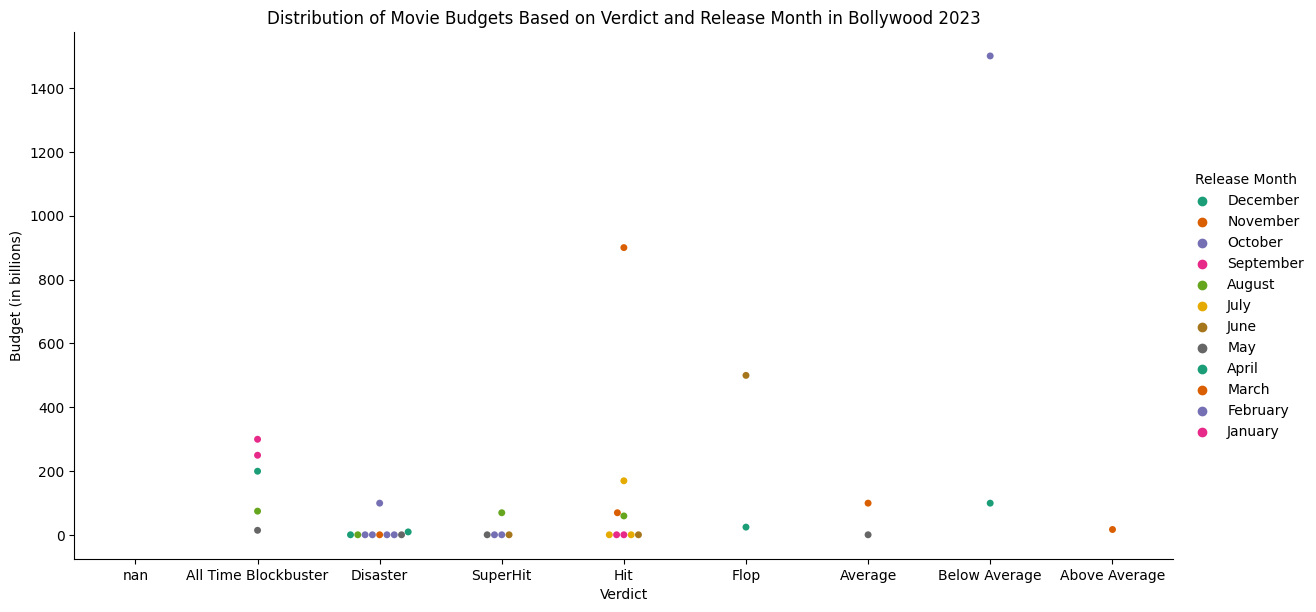

In [17]:
# Catplot for the distribution of movie budgets based on Verdict and Release Month
plt.figure(figsize=(16, 8))
sns.catplot(x='Verdict', y='Budget', hue='Release Month', data=df, kind='swarm', palette='Dark2', height=6, aspect=2)
plt.title('Distribution of Movie Budgets Based on Verdict and Release Month in Bollywood 2023')
plt.xlabel('Verdict')
plt.ylabel('Budget (in billions)')
plt.show()


**Can we visualize the relationship between different financial metrics for movies in Bollywood 2023 using a pair plot?**

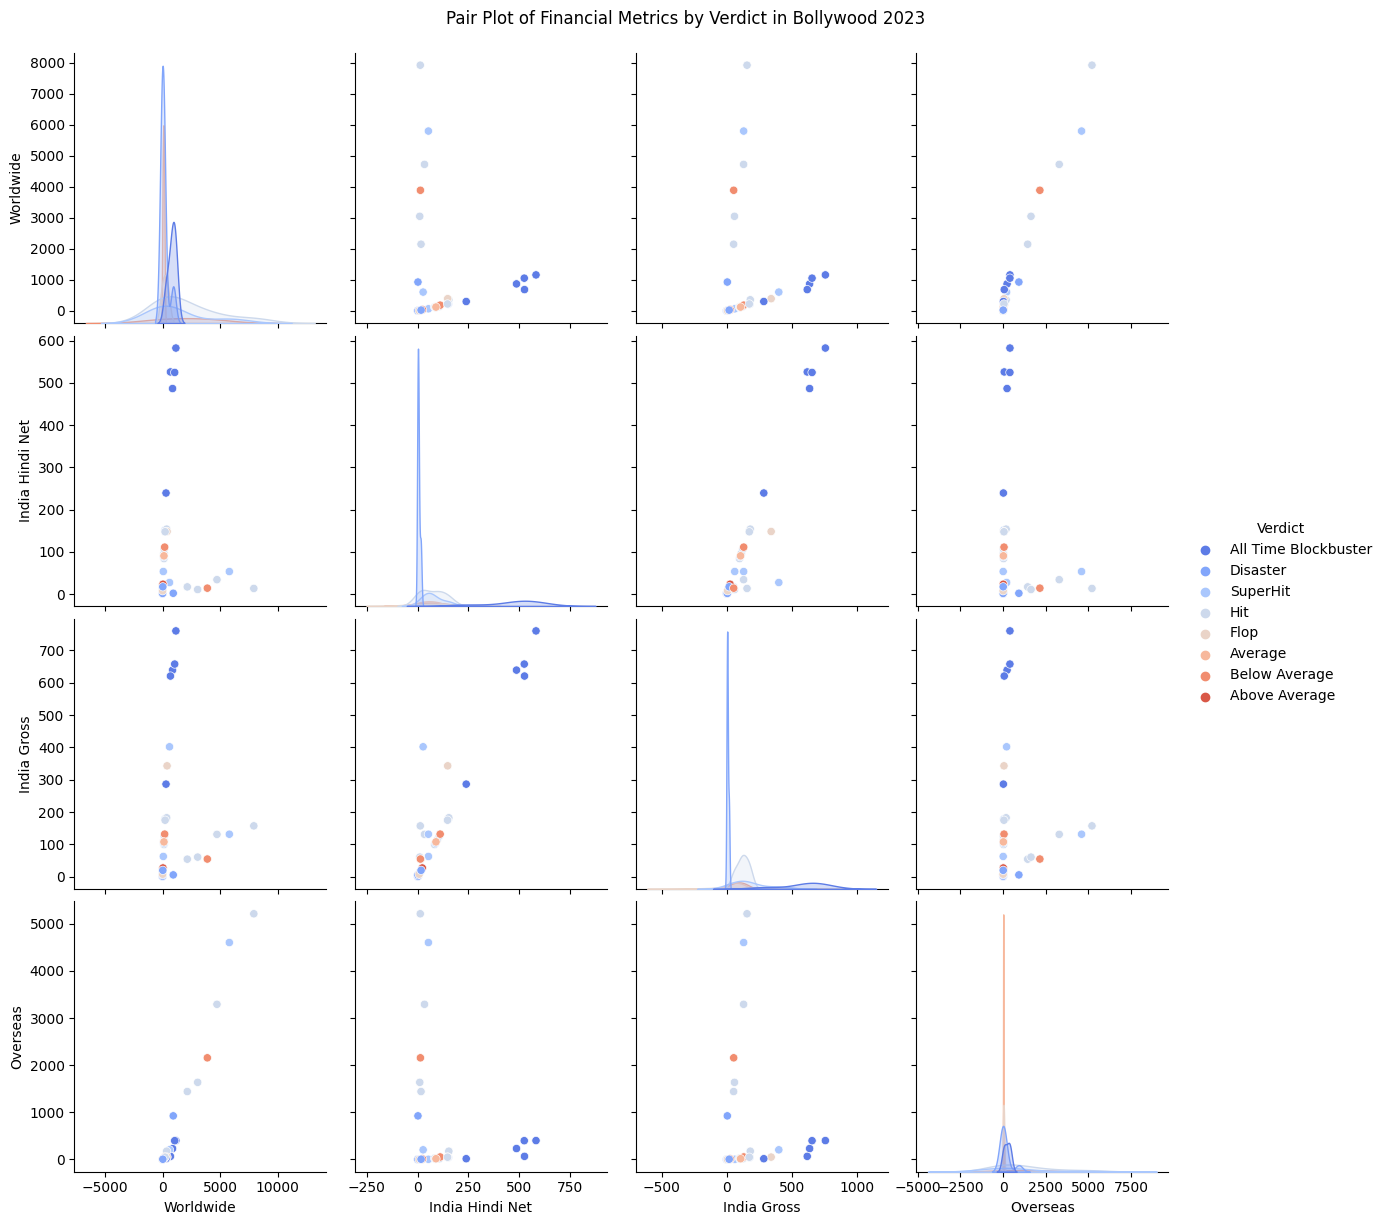

In [18]:
# Pair plot for Worldwide, India Hindi Net, India Gross, and Overseas earnings
financial_metrics = ['Worldwide', 'India Hindi Net', 'India Gross', 'Overseas']
sns.pairplot(df, vars=financial_metrics, hue='Verdict', palette='coolwarm', height=3)
plt.suptitle('Pair Plot of Financial Metrics by Verdict in Bollywood 2023', y=1.02)
plt.show()


**What is the relationship between India Hindi Net and Overseas earnings for movies in different release months?**

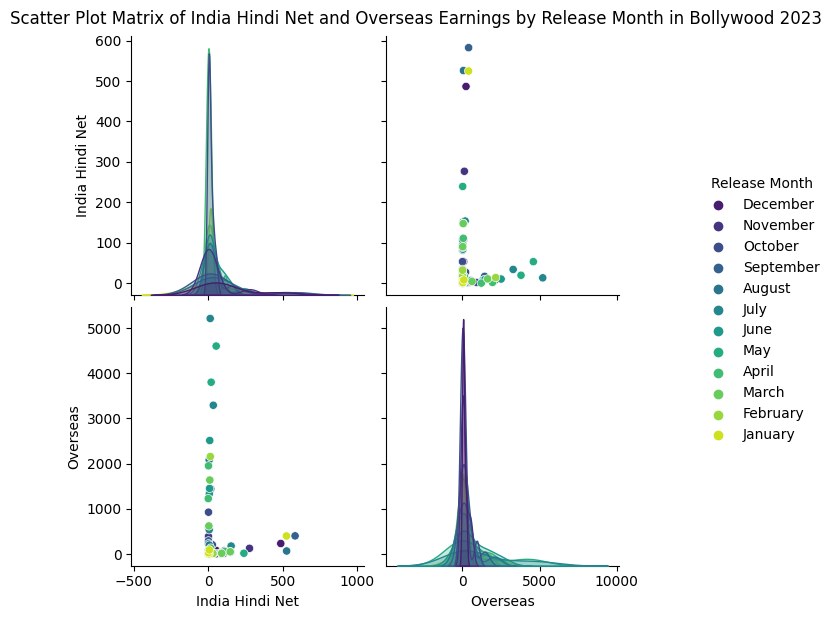

In [19]:
# Scatter plot matrix for India Hindi Net and Overseas earnings, colored by Release Month
earnings_columns_month = ['India Hindi Net', 'Overseas']
sns.pairplot(df, vars=earnings_columns_month, hue='Release Month', palette='viridis', height=3)
plt.suptitle('Scatter Plot Matrix of India Hindi Net and Overseas Earnings by Release Month in Bollywood 2023', y=1.02)
plt.show()


**Can we visualize the distribution of movie budgets based on their verdict, release months, and genres using pair plots?**

<Figure size 1600x1000 with 0 Axes>

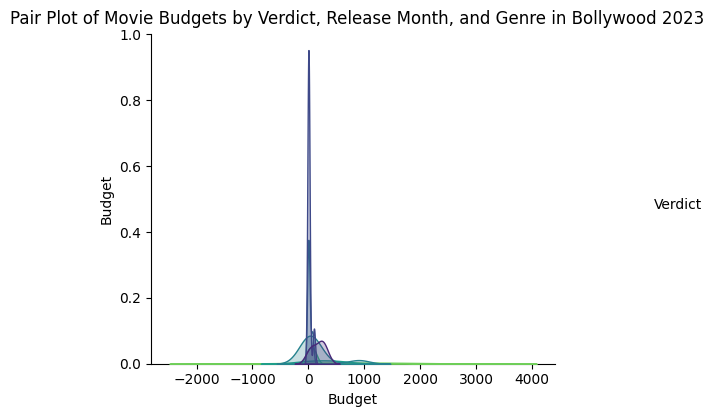

In [20]:
# Pair plot for Budget, colored by Verdict, Release Month, and Genre
plt.figure(figsize=(16, 10))
sns.pairplot(df, vars=['Budget'], hue='Verdict', markers=['o', 's', 'D'], palette='viridis', height=4, aspect=1.2, diag_kind='kde')
plt.suptitle('Pair Plot of Movie Budgets by Verdict, Release Month, and Genre in Bollywood 2023', y=1.02)
plt.show()


**What is the average worldwide earnings for movies with different verdicts?**

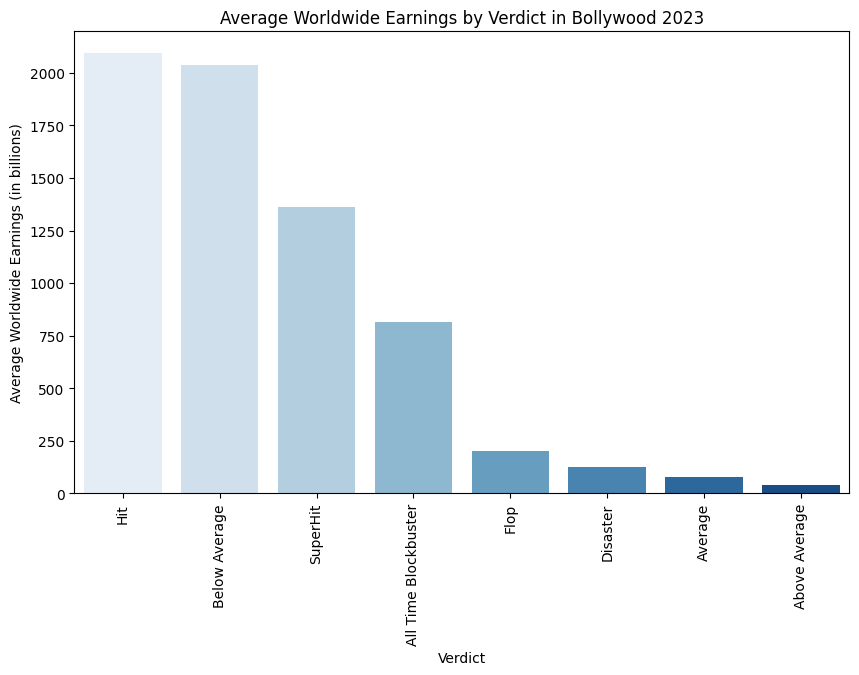

In [21]:
# Bar chart for average worldwide earnings by Verdict
average_worldwide_earnings = df.groupby('Verdict')['Worldwide'].mean().sort_values(ascending=False)
plt.figure(figsize=(10, 6))
sns.barplot(x=average_worldwide_earnings.index, y=average_worldwide_earnings.values, palette='Blues')
plt.title('Average Worldwide Earnings by Verdict in Bollywood 2023')
plt.xlabel('Verdict')
plt.xticks(rotation=90)
plt.ylabel('Average Worldwide Earnings (in billions)')
plt.show()


**What is the average budget for movies with different verdicts and release months?**

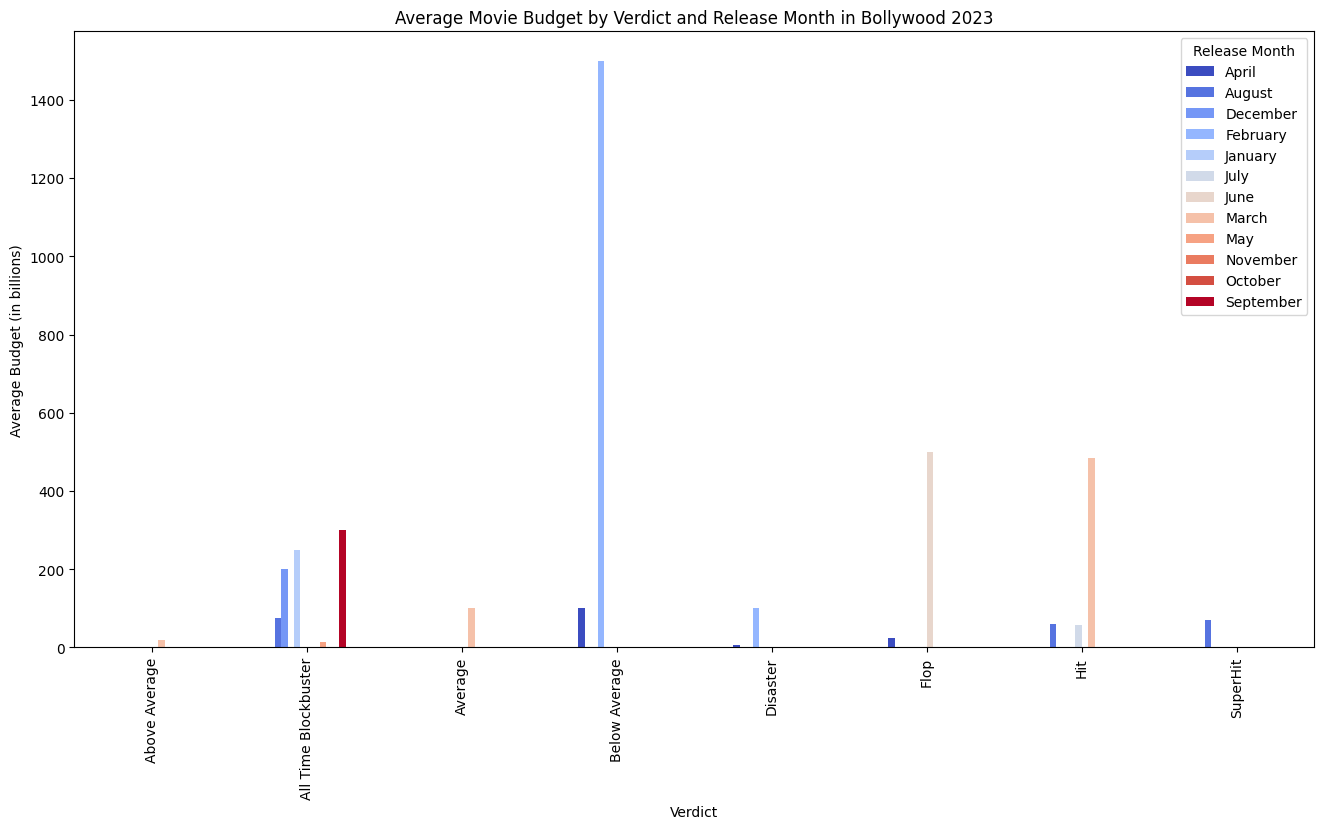

In [22]:
# Bar chart for average budget by Verdict and Release Month
average_budget_by_verdict_and_month = df.groupby(['Verdict', 'Release Month'])['Budget'].mean().unstack()
average_budget_by_verdict_and_month.plot(kind='bar', figsize=(16, 8), colormap='coolwarm')
plt.title('Average Movie Budget by Verdict and Release Month in Bollywood 2023')
plt.xlabel('Verdict')
plt.ylabel('Average Budget (in billions)')
plt.legend(title='Release Month', bbox_to_anchor=(1, 1))
plt.show()


**What is the average worldwide earnings for movies released in each month?**

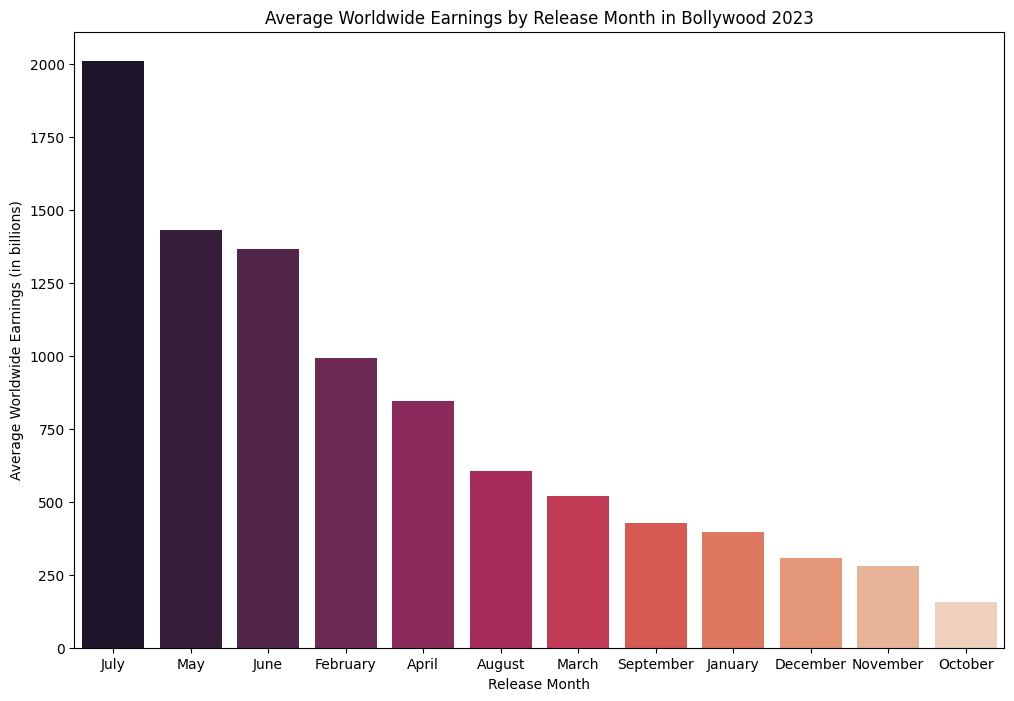

In [23]:
# Bar chart for average worldwide earnings by Release Month
average_worldwide_earnings_by_month = df.groupby('Release Month')['Worldwide'].mean().sort_values(ascending=False)
plt.figure(figsize=(12, 8))
sns.barplot(x=average_worldwide_earnings_by_month.index, y=average_worldwide_earnings_by_month.values, palette='rocket')
plt.title('Average Worldwide Earnings by Release Month in Bollywood 2023')
plt.xlabel('Release Month')
plt.ylabel('Average Worldwide Earnings (in billions)')
plt.show()
